## Interpreting the Relationship between Sentiment and Engagement

In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

%matplotlib inline

In [2]:
# import dataset
admin_posts = pd.read_excel("Hyundai_admin_post_data.xls")
comment_data = pd.read_excel("Hyundai_comment_data.xls")
fans_posts = pd.read_excel("Hyundai_fans_post_data.xls")

In [3]:
# investigate the dataset
print admin_posts.columns.values
print admin_posts.head()
print admin_posts.shape
print "*******************************************"
print comment_data.columns.values
print comment_data.head()
print comment_data.shape
print "*******************************************"
print fans_posts.columns.values
print fans_posts.head()
print fans_posts.shape

[u'Post_id' u'user_name' u'type' u'creation_date' u'creation_time' u'month'
 u'updated_date' u'updated_time' u'comments_count' u'likes_count' u'text'
 u'link' u'picture' u'sentiment' u'entities' u'ontologies' u'user_id'
 u'shares' u'Comments_Total_Sentiment' u'Positive_Sentiment'
 u'Negative_Sentiment' u'Number_of_Positive' u'Number_of_Negative'
 u'Number_of_Neutral' u'Total_Engagement' u'Total_Sentiment']
                             Post_id      user_name   type creation_date  \
8   190502954300421_1120646854619355  Hyundai Egypt  photo    2015-07-05   
37  190502954300421_1102994279717946  Hyundai Egypt  photo    2015-06-10   
38  190502954300421_1102430079774366  Hyundai Egypt  photo    2015-06-09   
41  190502954300421_1099567253393982  Hyundai Egypt  photo    2015-06-04   
42  190502954300421_1093184254032282  Hyundai Egypt  photo    2015-05-25   

   creation_time month updated_date updated_time  comments_count  likes_count  \
8       14:00:01  July   2015-07-11     15:06:38    

### A Trail to find if there is any relation between Content Snetiment and its Engagement ..
- For Admin Posts
    - I will build a __Multiple linear regression__ model using those features as independent variables __likes_count, comments_count, shares, Number_of_Positive, Number_of_Negative, Number_of_Neutral, Total_Engagement__ with the __Total_Sentiment__ feature as the dependent variable.


### First, Get rid of the irrelevant features  

In [4]:
admin_posts.drop(["Post_id","user_name","creation_date","creation_time","month","updated_date",
                              "updated_time","link","picture","user_id"], axis=1, inplace=True)
comment_data.drop(["Comment_id","user_name","creation_date","creation_time","month","weekday","hour",
                                  "user_id","Post_id"], axis=1, inplace=True)
fans_posts.drop(["Post_id","user_name","creation_date","creation_time","month","weekday","hour","updated_date",
                              "updated_time","link","picture","user_id"], axis=1, inplace=True)

# drop columns Which are all NANs 
admin_posts.dropna(axis=1, how='all')
comment_data.dropna(axis=1, how='all')
fans_posts.dropna(axis=1, how='all')


,type,comments_count,likes_count,text,sentiment,entities,ontologies,shares
0,photo,0,0,#لمهندسين #كهرباء - #اتصالات - #حاسبات - #اليك...,0,NaN,Hyundai,0
1,photo,0,0,#لمهندسين #كهرباء - #اتصالات - #حاسبات - #اليك...,0,NaN,Hyundai,0
2,status,1,1,هو تكيف العربية ضعيف ولا انا عندي مشكلة انا لس...,-8,NaN,NaN,0
3,photo,0,0,#لمهندسين #كهرباء - #اتصالات - #حاسبات - #اليك...,0,NaN,Hyundai,0
4,photo,0,0,#لمهندسين #كهرباء - #اتصالات - #حاسبات - #اليك...,-6,NaN,Hyundai,0
5,link,0,0,لمهندسين كهرباء - دورات تصميم - ومكتب فني - و...,0,NaN,Hyundai,0
6,photo,0,0,#لمهندسين #كهرباء - #اتصالات - #حاسبات - #اليك...,-6,NaN,Hyundai,0
7,link,0,0,لمهندسين كهرباء واتصالات واليكترونيات وحاسبات\...,0,NaN,Hyundai,0
9,status,1,0,لازم هنقف وقفه امام منتج هيونداي وهنعمل شكوى ج...,-4,NaN,HyundaiGhabbour,0
10,link,0,0,NaN,0,NaN,Ghabbour,0


### Now, Let's start by the Linear Regression Model

In [5]:
# import statsmodels 
import statsmodels.api as sm 

X = admin_posts[["likes_count","comments_count","shares",'Number_of_Positive','Number_of_Negative',
                 'Number_of_Neutral','Total_Engagement']] ## independent variables
y = admin_posts["Total_Sentiment"] ## dependent variable
X = sm.add_constant(X) ## let's add an intercept (b0) to our model

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total_Sentiment   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.407e+05
Date:                Tue, 29 Aug 2017   Prob (F-statistic):               0.00
Time:                        02:43:51   Log-Likelihood:                -1052.8
No. Observations:                 296   AIC:                             2120.
Df Residuals:                     289   BIC:                             2145.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                 -2.1625      0.665     -3.254      0.001        -3.471    -0.854
likes_count            0.9091      0.041     22.089      0.000         0.828     0.990
comments_count         0.0554      0.046      1.203      0.230        -0.035     0.146
shares                -0.0874      0.043     -2.014      0.045        -0.173    -0.002
Number_of_Positive     2.9708      0.103     28.933      0.000         2.769     3.173
Number_of_Negative    -3.5205      0.207    -17.015      0.000        -3.928    -3.113
Number_of_Neutral     -0.1791      0.062     -2.885      0.004        -0.301    -0.057
Total_Engagement       0.0929      0.041      2.272      0.024         0.012     0.173
==============================================================================
Omnibus:                      105.003   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2453.594
Skew:                           0.839   Prob(JB):                         0.00
Kurtosis:                      17.004   Cond. No.                     9.47e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.22e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

By Interpreting the previous results we can see the following:
- R-squared/ Adj. R-squared= 1.000: Means that the __SUM (yi - y^i)2__ is minimized as possible.
- P-value of the __likes_count, comments_count, , Number_of_Positive, Number_of_Negative, Number_of_Neutral and shares__ variables differs; the variables with __P-value < 0.05__ which represents the __Significance Level S.L__ are more statistically significant which means they will have more impact on the prediction of the dependent variable -_Highly correlated_.

### Now,
I can say that the Total_Sentiment value is __highly dependent__ on likes_count, shares, Number_of_Positive, Number_of_Negative, Number_of_Neutral, and Total_Engagement features.

## Now, that I know that comments_count, likes_count, and shares are contributing in caculating the Total_Engagement feature. They seems to be (redundant) in our model.

## - But That doesn't change the fact that Total_Sentiment is highly dependent on Total_Engaement.

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5]), <a list of 12 Text yticklabel objects>)

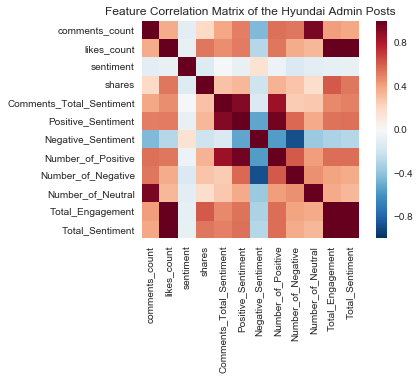

In [6]:
cm1 = admin_posts.corr()
sns.heatmap(cm1, square = True)
plt.title('Feature Correlation Matrix of the Hyundai Admin Posts')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

In [7]:
x2 = comment_data["sentiment"]
y2 = comment_data["likes_count"]

# I noticed that user_likes is mostly zero
print "Mode of user likes number = %d" % comment_data["user_likes"].mode()
print "Max of user likes number = %d" % comment_data["user_likes"].max()
print "Min of user likes number = %d" % comment_data["user_likes"].min()

# It turned up that it is all zeros, so it is definitely irrelevant 
comment_data.drop("user_likes",axis=1, inplace=True)

Mode of user likes number = 0
Max of user likes number = 0
Min of user likes number = 0


In [8]:
# investigating the number column in the comment data 
print "Mode of user likes number = %d" % comment_data["number"].mode()
print "Max of user likes number = %d" % comment_data["number"].max()
print "Min of user likes number = %d" % comment_data["number"].min()
# the previous stats shows that the number column value is all ones
# ,so it is also irrelevant 
comment_data.drop("number",axis=1, inplace=True)


Mode of user likes number = 1
Max of user likes number = 1
Min of user likes number = 1


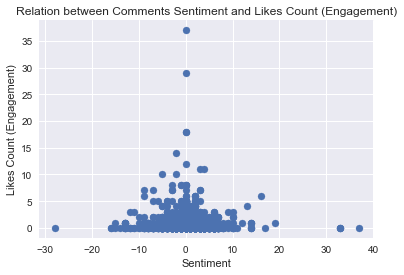

The association between comment sentiment and user engagement(Likes Count)
(-0.010298462283935701, 0.39851492471716077)


In [12]:
plt.scatter(x2, y2)
plt.title('Relation between Comments Sentiment and Likes Count (Engagement)')
plt.xlabel('Sentiment')
plt.ylabel('Likes Count (Engagement)')
plt.show()

print ("The association between comment sentiment and user engagement(Likes Count)")
print (scipy.stats.pearsonr(x2, y2))


By investigating the previous results of the __Comment Dataset__, we can see that the __Likes count__ variable and the __sentiment__ is  __highly uncorrelated__ with a __very low Pearson correlation coefficent ~ -0.01029__ and a relatively __high P-value ~ 0.39_

Also, by plotting the 2 variables together they form a barely __right-skewed distribution__. 

In [25]:
x3 = fans_posts["sentiment"]
y3 = fans_posts["comments_count"]
#y3 = fans_posts["shares"]
#y3 = fans_posts["likes_count"]

In [22]:
# let's see if it is necessary to include (shares) in our stats
print "Mode of user likes number = %d" % fans_posts["shares"].mode()
print "Max of user likes number = %d" % fans_posts["shares"].max()
print "Min of user likes number = %d" % fans_posts["shares"].min()
# it turns out that this is not necessary..

Mode of user likes number = 0
Max of user likes number = 3
Min of user likes number = 0


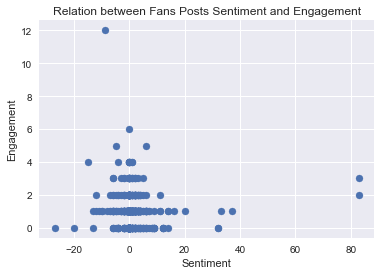

The association between Fans Postssentiment and User Engagement
(-0.021284513654415565, 0.59593588262160146)


(array([ 0.5,  1.5,  2.5,  3.5]), <a list of 4 Text yticklabel objects>)

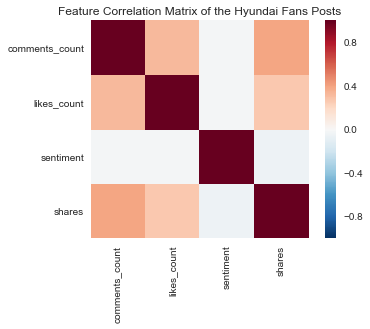

In [26]:
plt.scatter(x3, y3)
plt.title('Relation between Fans Posts Sentiment and Engagement')
plt.xlabel('Sentiment')
plt.ylabel('Engagement')
plt.show()

# calculate pearson correlation
print ("The association between Fans Postssentiment and User Engagement")
print (scipy.stats.pearsonr(x3, y3))

cm3 = fans_posts.corr()
sns.heatmap(cm3, square = True)
plt.title('Feature Correlation Matrix of the Hyundai Fans Posts')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

By investigating the previous results of the Fans __Posts Dataset__, we can see that both __Comments count__ and __Likes count__   variables and the __sentiment__ are __highly uncorrelated__ with __very low Pearson correlation coefficents ~ -0.0212__ and __-0.0165 __ and a relatively __high P-values ~ 0.5959__ and __0.6798__.